In [47]:
setwd(getwd())   

In [48]:
Sys.setlocale("LC_CTYPE", "thai")
options(encoding="UTF-8")

[1] "Thai_Thailand.874"

## Import Library

In [49]:
library("readxl")

## Import Data

In [50]:
df_time <- read_excel('Expense-Records_6210501001.xlsx',sheet="Sheet3")
attach(df_time)
df_time

The following objects are masked from df_time (pos = 3):

    date, Item, Month, Output

The following objects are masked from df_time (pos = 4):

    date, Item, Month, Output

The following objects are masked from df_time (pos = 5):

    Item, Month, Output

The following objects are masked from df_time (pos = 6):

    Item, Output

The following objects are masked from df_time_feb:

    date, Item, Output

The following objects are masked from df_time_jan:

    date, Item, Output



date,Item,Output,Month
2022-01-04,เงินสำหรับใช้จ่าย,0,1
2022-01-05,-,0,1
2022-01-06,-,0,1
2022-01-07,นมเปรี้ยวดัชมิลล์,35,1
2022-01-08,ยาคูลล์,45,1
2022-01-09,-,0,1
2022-01-10,-,0,1
2022-01-11,-,0,1
2022-01-12,-,0,1
2022-01-13,-,0,1


## Anova1

พิสูจน์รายจ่ายเฉลี่ยของเดือนมกราคมกับเดือนกุมภาพันธ์เท่ากันหรือไม่

In [51]:
monthFactor <- factor(df_time$Month)
anovaResult <- aov(df_time$Output~monthFactor, data=df_time)
summary(anovaResult)

            Df Sum Sq Mean Sq F value Pr(>F)
monthFactor  1  20047   20047   2.733  0.104
Residuals   56 410788    7335               

In [52]:
qf(0.99, 1, 56)

[1] 7.110288

In [53]:
qtukey(0.01, nmeans=anovaResult$rank, df=anovaResult$df.residual, lower.tail=F)

[1] 3.771018

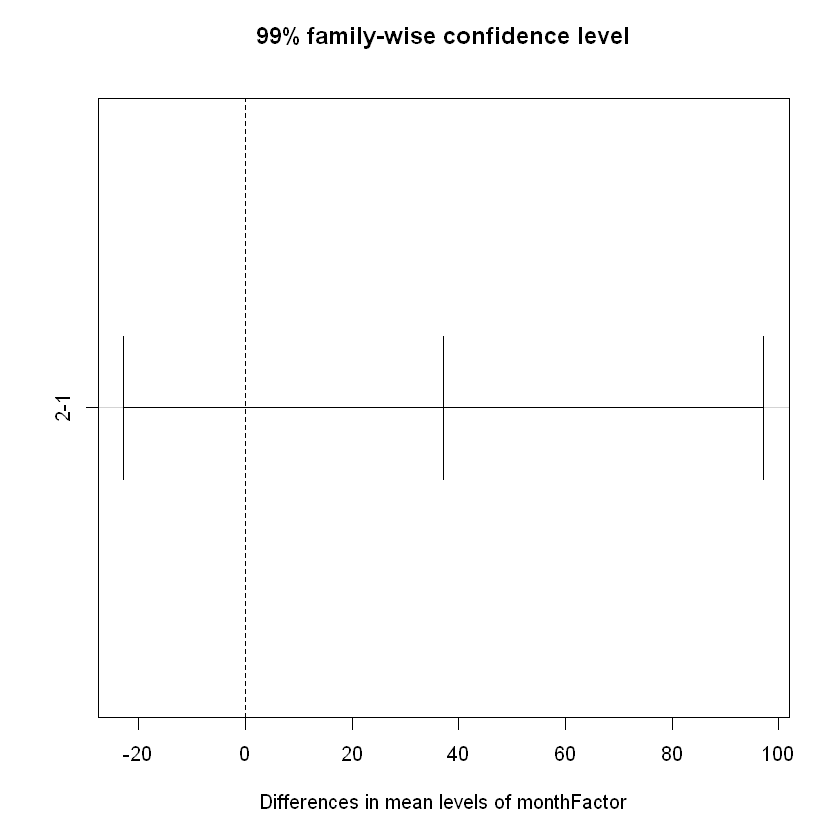

In [54]:
tk <- TukeyHSD(anovaResult, conf.level = 0.99)
plot(tk)

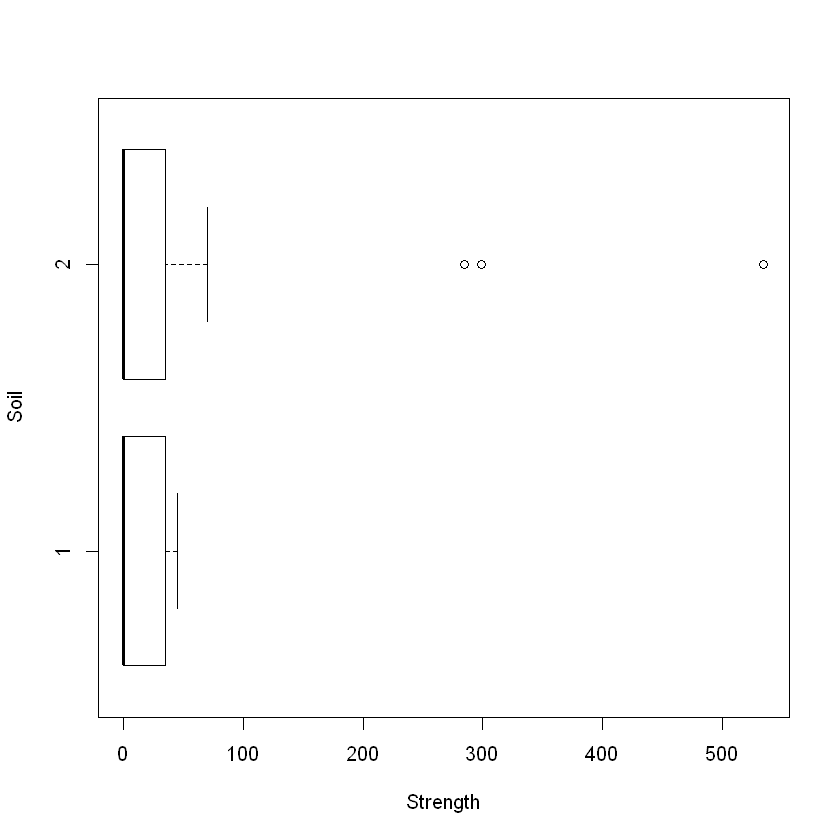

In [55]:
boxplot(df_time$Output~df_time$Month, horizontal=T, xlab="Strength", ylab="Soil")